In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('local-international-sports.csv') #sinhala language detected

In [3]:
df.head()

,දෙවැනි තරගයේ ජය ඉන්දියාවට,1
0,දකුණු අප්‍රිකා - ඉන්දියා දෙවන තරගය අද,1
1,මල්ෂා ෂෙහානි වාර්තාවක් සමගින් ශ්‍රී ලංකාවට ජය ...,1
2,ශ්‍රී ලංකා කාන්තා පිල මැලේසියාව පරදයි,1
3,සමස්ත ලංකා පාසල් ක්‍රීඩා තරග යළිත්,1
4,ශ්‍රී ලංකා කාන්තා ක්‍රිකට් කණ්ඩායම තායිලන්තය ප...,1


<Axes: xlabel='1', ylabel='count'>

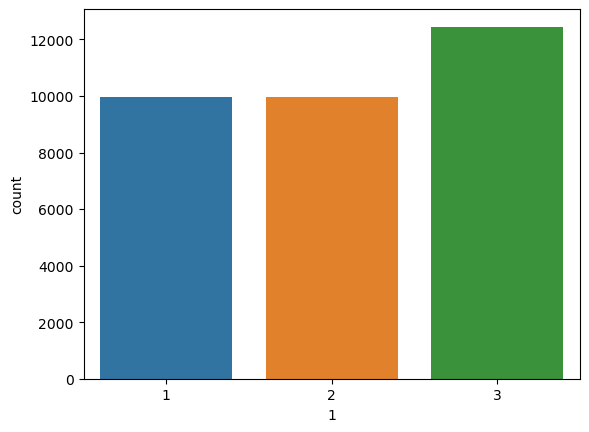

In [4]:
sns.countplot(x=df['1'])

In [5]:
df.shape

(32369, 2)

In [6]:
y=df['1']
X=df['දෙවැනි තරගයේ ජය ඉන්දියාවට']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
len(X_train),len(X_test)

(25895, 6474)

In [9]:
X_train[0]

'දකුණු අප්\u200dරිකා - ඉන්දියා දෙවන තරගය අද'

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [48]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,9))),
              ('nb',MultinomialNB())
             ])


In [49]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 9))),
                ('nb', MultinomialNB())])

In [50]:
clf.score(X_test,y_test)

0.8056842755637936

In [51]:
prediction=clf.predict(X_test)

In [52]:
prediction[:10]

array([2, 3, 3, 1, 2, 3, 1, 3, 1, 2])

In [53]:
y_test[:10]

10476    2
21162    3
22041    3
5665     1
17725    2
28393    3
6651     1
25112    3
21249    3
13469    2
Name: 1, dtype: int64

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.86      0.84      0.85      1974
           2       0.82      0.75      0.78      2030
           3       0.76      0.82      0.79      2470

    accuracy                           0.81      6474
   macro avg       0.81      0.80      0.81      6474
weighted avg       0.81      0.81      0.81      6474



In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.86      0.84      0.85      1974
           2       0.82      0.75      0.78      2030
           3       0.76      0.82      0.79      2470

    accuracy                           0.81      6474
   macro avg       0.81      0.80      0.81      6474
weighted avg       0.81      0.81      0.81      6474



In [27]:
confusion_matrix(y_test,prediction)

array([[1662,   89,  223],
       [  86, 1517,  427],
       [ 182,  251, 2037]])